In [1]:
import scipy.io as si
import numpy as np

#load dat afrom ex5data1.mat file
File = si.loadmat('ex5data1.mat')

#initialize various variables
Lambda = 1

m_train = len(File['X'])
m_cross = len(File['Xval'])
m_test = len(File['Xtest'])

#create feature matrix and corresponding result
X_train = np.array(File['X']).reshape(m_train,1)
X_train = np.insert(X_train,0,1,1)
y_train = np.array(File['y']).reshape(m_train,1)

#create feature matrix and corresponding result for cross-validation
X_cross = np.array(File['Xval']).reshape(m_cross,1)
X_cross = np.insert(X_cross,0,1,1)
y_cross = np.array(File['yval']).reshape(m_cross,1)

#create feature matrix and corresponding result for test
X_test = np.array(File['Xtest']).reshape(m_test,1)
X_test = np.insert(X_test,0,1,1)
y_test = np.array(File['ytest']).reshape(m_test,1)

n = 2

#create initiall parameters (theta)
theta = np.ones((n,1 ))

In [2]:
#plot training data
import matplotlib.pyplot as plt

plt.plot(X_train.T[1:],y_train.T,'rx')
plt.show()

In [3]:
#Cost function which compute cost for a particular theta
def Compute_cost_reg(theta,x,y,m,Lambda,n):
    theta = theta.reshape(n,1)
    
    #compute cost
    term1 = (np.dot(x,theta) - y)
    cost = (np.sum(np.multiply(term1,term1)))/(2*m)
    
    #compute regulariztion term
    reg = (Lambda/(2*m))*np.sum(theta[1:]*theta[1:])
    cost = cost + reg
    return cost

print("Cost at theta = [1 ; 1]:",Compute_cost_reg(theta,X_train,y_train,m_train,Lambda,n))

Cost at theta = [1 ; 1]: 303.99319222


In [4]:
#batch gradient descent
def Gradient_Descent(theta,x,y,m,Lambda,n):
        theta = theta.reshape(n,1)
        #compute gradient
        term1 = (np.dot(x,theta) - y)
        gradient = (1/m)*(np.dot(x.T,term1))
        
        #compute reularization term
        reg = (Lambda/m)*(theta[1:])
        gradient[1:] = gradient[1:] + reg
        gradient = np.ndarray.flatten(gradient)
        
        return gradient

print("Gradient at theta = [1 ; 1]:",Gradient_Descent(theta,X_train,y_train,m_train,Lambda,n))

Gradient at theta = [1 ; 1]: [ -15.30301567  598.25074417]


In [5]:
#optimize our parameters using fmin_cg
import scipy.optimize
theta = np.ndarray.flatten(theta)

def trainLinearReg(theta,X_train,y_train,m_train,Lambda,n):
    opt =  scipy.optimize.fmin_cg(Compute_cost_reg, x0=theta ,fprime = Gradient_Descent,args=(X_train,y_train,m_train,Lambda,n),disp = True)
    
    return opt.flatten()

opt = trainLinearReg(theta,X_train,y_train,m_train,0,n)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


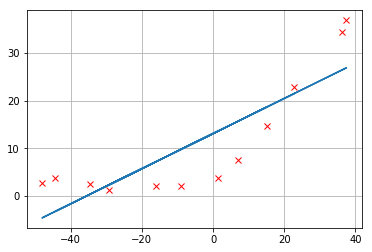

In [6]:
#plot Linear Fit
import matplotlib.pyplot as plt

plt.plot(X_train.T[1:],y_train.T,'rx')
plt.plot(X_train.T[1],np.dot(X_train,opt.reshape(n,1)))
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 3.286783
         Iterations: 4
         Function evaluations: 19
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 13
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization ter

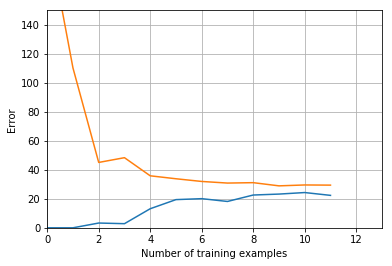

3.944304526105059e-31     205.12109574547353
2.465190328815662e-31     110.3003661076469
3.2867834358194092     45.093467423806864
2.8426776894048627     48.3689046724017
13.154048809114979     35.86516569569131
19.443962512495464     33.82996159713876
20.098521655088884     31.97098579817001
18.17285869520002     30.862446323779142
22.609405424954723     31.135997955024656
23.261461592611816     28.936207468250203
24.317249588044152     29.551431621997956
22.37390649510891     29.433818129942676


In [7]:
#Learning Curves

def learning_curves(X_train,y_train,X_cross,y_cross,m_train,m_cross,Lambda,n):
    #stores error for differnt tarining data of training and cross-validation
    error_train = list()
    error_cross = list()
    
    opt = np.zeros((n,1))
    np.ndarray.flatten(opt)
    
    #compute error for different size of training data
    for i in range(m_train):
        
        #compute parameters for different sizes of training data
        opt = trainLinearReg(opt,X_train[0:i+1],y_train[0:i+1],i+1,Lambda,n)
        
        #compute training error
        #pass lambda = 0 as no regularization is add in error
        error_train.append(float(Compute_cost_reg(opt,X_train[0:i+1],y_train[0:i+1],i+1,0,n)))
        
        #compute cross-validation error
        #pass lambda = 0 as no regularization is add in error
        error_cross.append(float(Compute_cost_reg(opt,X_cross,y_cross,m_cross,0,n)))
    
    return error_train , error_cross

error_train , error_cross = learning_curves(X_train,y_train,X_cross,y_cross,m_train,m_cross,0,n)

#plot training error and cross validation error
plt.plot(error_train)
plt.plot(error_cross)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 150)
plt.grid(True)
plt.show()

for i in range(m_train):
    print(error_train[i] ,"   ", error_cross[i])

In [8]:
#polynomial regression

#number of features required in new polynomial matrix
p = 8

def add_polynomial_features(p,X):
    temp = X
    for i in range(2,p + 1 ):
        temp = np.insert(temp,i-1,(X.T)**i,1)
    
    return temp

def feature_normalize(X,mean,std,b):
    if(b == 0):
        
    
        mean_s = np.zeros((X.shape[1],1))
        std_s = np.zeros((X.shape[1],1))
    
        for i in range(X.shape[1]):
                mean_s[i] = mean = X[:,i].mean()
                std_s[i] = std_d = X[:,i].std()
                l = X[:,i]
                l = (l - mean)/std_d
                X[:,i] = l
        return X , mean_s , std_s
    else:
        for i in range(X.shape[1]):
    
            l = X[:,i]
            l = (l - mean[i])/std[i]
            X[:,i] = l
        
        return X , 0 , 0

def Create_Poly_Norm(X,p,m,s,b):
    
    temp = add_polynomial_features(p,X)
    temp , mean_s , std_s= feature_normalize(temp,m,s,b)
    temp = np.insert(temp,0,1,1)
    
    return temp , mean_s , std_s

#create a Polynomial Feature Matrix for training data
X_poly_train , mean_train , std_train= Create_Poly_Norm(File['X'],p,0,0,0)

#create a Polynomial Feature Matrix for Cross-Validation data
X_poly_cross , mean_cross , std_cross = Create_Poly_Norm(File['Xval'],p,mean_train,std_train,1)

#create a Polynomial Feature Matrix for Testing data
X_poly_test , mean_test , std_test = Create_Poly_Norm(File['Xtest'],p,mean_train,std_train,1)



In [9]:
print(X_poly_cross[0])

[ 1.         -0.40647004 -0.75357738  0.17626474 -0.72907603  0.31703757
 -0.6156137   0.35926361 -0.53084786]


In [10]:
#learn parameters for normalize and polynomial feature matrix for training data
la = 0
t_theta = np.zeros((p+1,1))
t_theta = np.ndarray.flatten(t_theta)
t_opt = trainLinearReg(t_theta,X_poly_train,y_train,m_train,la,p+1)

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 893
         Function evaluations: 1688
         Gradient evaluations: 1688


In [11]:
print(t_opt)

[ 11.21758134   9.13027417  18.19410311  28.94562814 -27.31632304
 -74.54482761   6.85508897  60.76979238  20.640415  ]


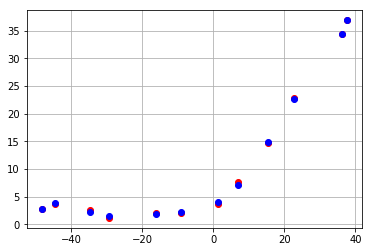

In [12]:
#plot Polynomial Regression
import matplotlib.pyplot as plt

plt.plot(X_train.T[1:],y_train.T,'ro')


plt.plot(File['X'],np.dot(X_poly_train,t_opt.reshape(p+1,1)),'bo')
plt.grid(True)
plt.show()

(2512, 9)


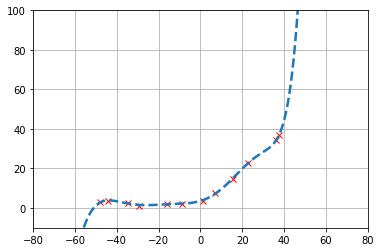

In [13]:
#create a new bigger training data set 
X_train_test = np.arange(X_train.min() - 15,X_train.max() + 25 ,.05)
X_train_test1 = X_train_test.reshape(len(X_train_test),1)

X_train_test ,mean , std=  Create_Poly_Norm(X_train_test1 ,p,mean_train,std_train,1)
print(X_train_test.shape)

#plot Polynomial Regression
import matplotlib.pyplot as plt

plt.plot(X_train.T[1:],y_train.T,'rx')
plt.plot(X_train_test1,np.dot(X_train_test,t_opt.reshape(p+1,1)),'--',linewidth = 2.5)
plt.xlim(-80,80)
plt.ylim(-10,100)
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 105
         Gradient evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 117
         Function evaluations: 204
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 248
         Function evaluations: 431
 

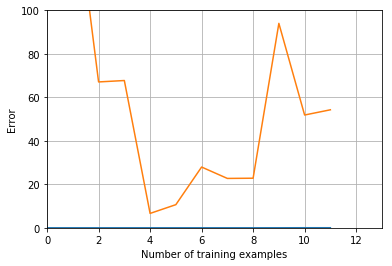

In [14]:
#plot learning curves for polynomial regression

error_train , error_cross =  learning_curves(X_poly_train,y_train,X_poly_cross,y_cross,m_train,m_cross,la,p+1)

plt.plot(error_train)
plt.plot(error_cross)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0,13)
plt.ylim(0,100)
plt.grid(True)
plt.show()

In [15]:
error_train

[0.0,
 1.5221317685272304e-28,
 1.2167735385968072e-10,
 1.2095402184693244e-08,
 8.367748513577525e-09,
 2.929011410649464e-10,
 7.748218317855142e-08,
 3.5238272994876885e-08,
 1.1620574834480763e-05,
 0.010836477743588565,
 0.031223909638964997,
 0.028891130857876802]

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 893
         Function evaluations: 1688
         Gradient evaluations: 1688
         Current function value: 0.169419
         Iterations: 371
         Function evaluations: 736
         Gradient evaluations: 724
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 101
         Function evaluations: 200
         Gradient evaluations: 200
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 97
         Function evaluations: 195
         Gradient evaluations: 195
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 71
         Function evaluations: 143
         Gradient evaluations: 143
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 29
         Function evaluations: 68
         Gradient evaluat

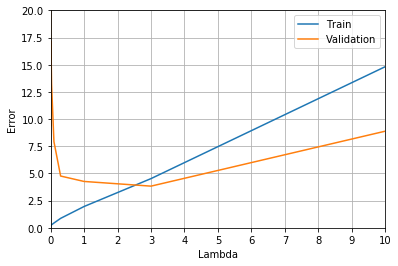

In [16]:
#select Lambda automatically usin validation curve
import matplotlib.ticker as ticker

def Validation_Curve(X_poly_train,y_train,X_poly_cross,y_cross,m_train,m_cross,n):
                     
    lambda_vec = [0 ,0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3 ,10]
    error_train = list()
    error_cross = list()
                     
    opt = np.zeros((n,1))
    np.ndarray.flatten(opt)
    
    for Lambda in  lambda_vec:
        
        #compute parameters for different sizes of Lambda
        opt = trainLinearReg(opt,X_poly_train,y_train,m_train,Lambda,n)
        
        #compute training error
        error_train.append(float(Compute_cost_reg(opt,X_poly_train,y_train,m_train,0,n)))
        
        #compute cross-validation error
        error_cross.append(float(Compute_cost_reg(opt,X_poly_cross,y_cross,m_cross,0,n)))
    
    return  lambda_vec , error_train , error_cross 

Lambda_vec , Error_train , Error_cross = Validation_Curve(X_poly_train,y_train,X_poly_cross,y_cross,m_train,m_cross,p+1)

fig , ax = plt.subplots(1,1)

plt.plot(Lambda_vec,Error_train ,label = 'Train')
plt.plot(Lambda_vec,Error_cross ,label = 'Validation')
plt.grid(True)
plt.legend()
plt.xlim(0,10)
plt.ylim(0,20)
plt.xlabel('Lambda')
plt.ylabel('Error')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [17]:
Error_cross

[54.121524034492225,
 9.341070968808237,
 15.930174937133957,
 17.144176184392922,
 13.217559316652837,
 7.926807659023392,
 4.7608223617295,
 4.263350945371395,
 3.8321726646079393,
 8.88971405342091]

In [18]:
#compute Test Error

Lamda = 3

Opt = np.zeros((p+1,1))
np.ndarray.flatten(Opt)

Opt = trainLinearReg(Opt,X_poly_train,y_train,m_train,Lamda,p+1)

#pass lambda = 0 as no regularization is add in error
Test_error = Compute_cost_reg(Opt,X_poly_test,y_test,m_test,0,p+1)

print(Test_error)

Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24
3.57202661906


In [19]:
# Plotting learning curves with randomly selected examples
    

def Learning_Curves_Random(X_poly_train,m_train,X_poly_cross,m_cross,Lambda,n):
    error_train = list()
    error_cross = list()
    counter = 0
    opt = np.zeros((n,1))
    np.ndarray.flatten(opt)
    
    for i in range(m_train):
        
        err_train = list()
        err_cross = list()
        
        for j in range(50):
            
            #randomly select i training data
            rand_train_data = np.random.randint(0,m_train,i + 1)
            
            #generate randomly selected training data and corresponding result
            test_train_data = X_poly_train[rand_train_data]
            test_y_train = y_train[rand_train_data]
            
            #randomly select i cross validation data
            rand_cross_data = np.random.randint(0,m_cross,i + 1)
            
            #generate randomly selected cross validation data and corresponding result
            test_cross_data = X_poly_cross[rand_cross_data] 
            test_y_cross = y_cross[rand_cross_data]
            
            #train our parameter
            opt = trainLinearReg(opt,test_train_data,test_y_train,i + 1,Lambda,n)
            
            #compute error in test_train_data
            err_train.append(float(Compute_cost_reg(opt,test_train_data,test_y_train,i + 1,0,n)))
            
            #compute error in test_cross_data
            err_cross.append(float(Compute_cost_reg(opt,test_cross_data,test_y_cross,i + 1,0,n)))
            
        err_train = np.array(err_train)
        err_cross = np.array(err_cross)
        
        error_train.append(float(err_train.mean()))
        error_cross.append(float(err_cross.mean()))

    return error_train , error_cross

ERROR_TRAIN , ERROR_CROSS =  Learning_Curves_Random(X_poly_train,m_train,X_poly_cross,m_cross,.01,p+1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         G

         Current function value: 0.650416
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 0.228684
         Iterations: 4
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.228684
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.605309
         Iterations: 3
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 0.171732
         Iterations: 22
         Function evaluations: 60
         Gradient evaluations: 48
Optimization terminated successfully.
         Curre

Optimization terminated successfully.
         Current function value: 0.187461
         Iterations: 10
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.217295
         Iterations: 46
         Function evaluations: 104
         Gradient evaluations: 104
Optimization terminated successfully.
         Current function value: 0.187135
         Iterations: 58
         Function evaluations: 105
         Gradient evaluations: 105
Optimization terminated successfully.
         Current function value: 0.561058
         Iterations: 26
         Function evaluations: 59
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 0.176808
         Iterations: 16
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.344065
         Iterations: 46
         Function evaluations: 9

Optimization terminated successfully.
         Current function value: 0.038995
         Iterations: 95
         Function evaluations: 198
         Gradient evaluations: 198
Optimization terminated successfully.
         Current function value: 0.151420
         Iterations: 17
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.156549
         Iterations: 8
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.116034
         Iterations: 57
         Function evaluations: 92
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 0.345190
         Iterations: 75
         Function evaluations: 144
         Gradient evaluations: 144
Optimization terminated successfully.
         Current function value: 0.075357
         Iterations: 34
         Function evaluations: 76

         Current function value: 0.412937
         Iterations: 54
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 0.291760
         Iterations: 69
         Function evaluations: 124
         Gradient evaluations: 124
Optimization terminated successfully.
         Current function value: 0.133969
         Iterations: 71
         Function evaluations: 121
         Gradient evaluations: 121
Optimization terminated successfully.
         Current function value: 0.347403
         Iterations: 23
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.145511
         Iterations: 47
         Function evaluations: 100
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 0.364558
         Iterations: 32
         Function evaluations: 79
         Gradient evaluations: 79

Optimization terminated successfully.
         Current function value: 0.375048
         Iterations: 148
         Function evaluations: 240
         Gradient evaluations: 240
Optimization terminated successfully.
         Current function value: 0.300473
         Iterations: 30
         Function evaluations: 65
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 0.344207
         Iterations: 81
         Function evaluations: 156
         Gradient evaluations: 156
Optimization terminated successfully.
         Current function value: 0.186340
         Iterations: 149
         Function evaluations: 280
         Gradient evaluations: 280
Optimization terminated successfully.
         Current function value: 0.342400
         Iterations: 12
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 0.212371
         Iterations: 42
         Function evaluation

         Current function value: 0.245743
         Iterations: 8
         Function evaluations: 35
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.340687
         Iterations: 117
         Function evaluations: 205
         Gradient evaluations: 205
Optimization terminated successfully.
         Current function value: 0.538018
         Iterations: 178
         Function evaluations: 302
         Gradient evaluations: 302
Optimization terminated successfully.
         Current function value: 0.059150
         Iterations: 95
         Function evaluations: 190
         Gradient evaluations: 190
Optimization terminated successfully.
         Current function value: 0.236949
         Iterations: 20
         Function evaluations: 54
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 0.135902
         Iterations: 29
         Function evaluations: 64
         Gradient evaluations: 64

Optimization terminated successfully.
         Current function value: 0.304869
         Iterations: 138
         Function evaluations: 264
         Gradient evaluations: 264
Optimization terminated successfully.
         Current function value: 0.111472
         Iterations: 11
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.082833
         Iterations: 24
         Function evaluations: 53
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 0.305724
         Iterations: 134
         Function evaluations: 222
         Gradient evaluations: 222
Optimization terminated successfully.
         Current function value: 0.383135
         Iterations: 188
         Function evaluations: 338
         Gradient evaluations: 338
Optimization terminated successfully.
         Current function value: 0.116155
         Iterations: 236
         Function evaluati

Optimization terminated successfully.
         Current function value: 0.226746
         Iterations: 186
         Function evaluations: 346
         Gradient evaluations: 346
Optimization terminated successfully.
         Current function value: 0.242156
         Iterations: 101
         Function evaluations: 183
         Gradient evaluations: 183
Optimization terminated successfully.
         Current function value: 0.334779
         Iterations: 13
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.257874
         Iterations: 13
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 0.302835
         Iterations: 64
         Function evaluations: 142
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: 0.259875
         Iterations: 107
         Function evaluations: 189
         Gradient evaluations:

         Current function value: 0.179925
         Iterations: 33
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 0.198440
         Iterations: 66
         Function evaluations: 134
         Gradient evaluations: 134
Optimization terminated successfully.
         Current function value: 0.214766
         Iterations: 151
         Function evaluations: 291
         Gradient evaluations: 291
Optimization terminated successfully.
         Current function value: 0.134604
         Iterations: 226
         Function evaluations: 402
         Gradient evaluations: 402
Optimization terminated successfully.
         Current function value: 0.274052
         Iterations: 62
         Function evaluations: 125
         Gradient evaluations: 125
Optimization terminated successfully.
         Current function value: 0.334265
         Iterations: 150
         Function evaluations: 273
         Gradient evaluation

Optimization terminated successfully.
         Current function value: 0.262871
         Iterations: 260
         Function evaluations: 459
         Gradient evaluations: 459
Optimization terminated successfully.
         Current function value: 0.080266
         Iterations: 157
         Function evaluations: 261
         Gradient evaluations: 261
Optimization terminated successfully.
         Current function value: 0.250146
         Iterations: 150
         Function evaluations: 276
         Gradient evaluations: 276
         Current function value: 0.193802
         Iterations: 80
         Function evaluations: 156
         Gradient evaluations: 144
Optimization terminated successfully.
         Current function value: 0.238245
         Iterations: 151
         Function evaluations: 245
         Gradient evaluations: 245
         Current function value: 0.155505
         Iterations: 39
         Function evaluations: 83
         Gradient evaluations: 71
         Current function valu

Optimization terminated successfully.
         Current function value: 0.289783
         Iterations: 190
         Function evaluations: 374
         Gradient evaluations: 374
Optimization terminated successfully.
         Current function value: 0.259601
         Iterations: 199
         Function evaluations: 372
         Gradient evaluations: 372
Optimization terminated successfully.
         Current function value: 0.329935
         Iterations: 169
         Function evaluations: 286
         Gradient evaluations: 286
Optimization terminated successfully.
         Current function value: 0.280044
         Iterations: 143
         Function evaluations: 247
         Gradient evaluations: 247
Optimization terminated successfully.
         Current function value: 0.240533
         Iterations: 74
         Function evaluations: 146
         Gradient evaluations: 146
         Current function value: 0.161265
         Iterations: 82
         Function evaluations: 188
         Gradient evaluat

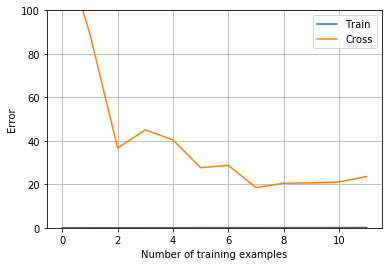

In [21]:
#plot data 
plt.plot(ERROR_TRAIN , label = 'Train')
plt.plot(ERROR_CROSS , label = 'Cross')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.ylim(0,100)
plt.grid(True)
plt.legend()
plt.show()